# Importing libraries

In [1]:
import os
import chemprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

C:\Users\prate\anaconda3\envs\chemprop\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_parity(y_true, y_pred, y_pred_unc=None):
    
    axmin = min(min(y_true), min(y_pred)) - 0.1*(max(y_true)-min(y_true))
    axmax = max(max(y_true), max(y_pred)) + 0.1*(max(y_true)-min(y_true))
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    
    plt.plot([axmin, axmax], [axmin, axmax], '--k')

    plt.errorbar(y_true, y_pred, yerr=y_pred_unc, linewidth=0, marker='o', markeredgecolor='w', alpha=1, elinewidth=1)
    
    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))
    
    ax = plt.gca()
    ax.set_aspect('equal')
    
    at = AnchoredText(
    f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}", prop=dict(size=10), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    
    plt.xlabel('True')
    plt.ylabel('Chemprop Predicted')
    
    plt.show()
    
    return

# Generate Mordred descriptors

In [3]:
# import pandas as pd
# import numpy as np

# X_train = pd.read_csv('test_checkpoints_reg/fold_0/train_full.csv')
# X_train = X_train.drop(['PCE_max(%)'], axis = 1)
# X_train = X_train.drop([191])  # Mordred is  not able to calculate descriptors for acceptor at this posotion
# X_train

# X_val=pd.read_csv('test_checkpoints_reg/fold_0/val_full.csv')
# X_val = X_val.drop(['PCE_max(%)'], axis = 1)
# X_val

# X_test=pd.read_csv('test_checkpoints_reg/fold_0/test_full.csv')
# X_test = X_test.drop(['PCE_max(%)'], axis = 1)
# X_test


# from rdkit.Chem import Descriptors
# from rdkit import Chem
# from rdkit.Chem import Draw
# from rdkit.Chem.Draw import IPythonConsole
# from mordred import Calculator,descriptors


# from rdkit.ML.Descriptors import MoleculeDescriptors
# des_list = [x[0] for x in Descriptors._descList]

# # Calculating Mordred descriptors for donors and acceptors
# def mordred_des(d,a):

#     smis = d   
#     mols = []
#     for smi in smis:
#         mols.append(Chem.MolFromSmiles(smi))
        
#     calc_d = Calculator(descriptors,ignore_3D=True)
    
# #     return calc_d.pandas(mols)


#     smis = a   
#     mols = []
#     for smi in smis:
#         mols.append(Chem.MolFromSmiles(smi))
        
#     calc_a = Calculator(descriptors,ignore_3D=True)
    
#     return pd.concat([calc_d.pandas(mols),calc_a.pandas(mols)], axis=1)


# D_smiles = X_train["p(SMILES)"]
# A_smiles = X_train["n(SMILES)"]
# X_train_mordred = mordred_des(D_smiles,A_smiles)

# D_smiles = X_val["p(SMILES)"]
# A_smiles = X_val["n(SMILES)"]
# X_val_mordred = mordred_des(D_smiles,A_smiles)

# D_smiles = X_test["p(SMILES)"]
# A_smiles = X_test["n(SMILES)"]
# X_test_mordred = mordred_des(D_smiles,A_smiles)

# X_train_mordred.to_csv('X_train_mordred.csv')
# X_val_mordred.to_csv('X_val_mordred.csv')
# X_test_mordred.to_csv('X_test_mordred.csv')


# Read saved mordred descriptors file

In [4]:
X_train_mordred = pd.read_csv('X_train_mordred.csv')
X_val_mordred = pd.read_csv('X_val_mordred.csv')
X_test_mordred = pd.read_csv('X_test_mordred.csv')

C:\Users\prate\anaconda3\envs\chemprop\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (234,235,236,237,238,239,240,241,242,342,343,344,345,346,347,348,349,350,450,451,452,453,454,455,456,457,546,547,548,549,550,551,552,553,642,643,781,782,2669,2671,2674,2679,2697,2748,2750,2753,2758,2776,2839,2840,2841,2842,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852,2855,2858,2860,2973,2974,2975,2983,3196) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
y_train=pd.read_csv('test_checkpoints_reg/fold_0/train_full.csv')
y_train = y_train.drop(['p(SMILES)', 'n(SMILES)'], axis = 1)
y_train=y_train.drop([191])  # Mordred is  not able to calculate descriptors for acceptor at this posotion

y_val=pd.read_csv('test_checkpoints_reg/fold_0/val_full.csv')
y_val = y_val.drop(['p(SMILES)', 'n(SMILES)'], axis = 1)

y_test=pd.read_csv('test_checkpoints_reg/fold_0/test_full.csv')
y_test = y_test.drop(['p(SMILES)', 'n(SMILES)'], axis = 1)

In [6]:
all_data = pd.concat([X_train_mordred,X_val_mordred,X_test_mordred])

all_data=all_data.select_dtypes(include='number')  
print('Features with zero standard deviation :',len(all_data.std()[all_data.std() == 0])) #displaying features with zero std deviation
all_data=all_data.drop(all_data.std()[all_data.std() == 0].index.values, axis=1)  # Dropping features with zero std deviation
all_data = all_data.replace([np.inf, -np.inf], np.nan)
all_data = all_data.replace(np.nan,0)  #replace null values with zero

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(all_data, 0.8)
print('Features with correlation more than 0.8 :',len(set(corr_features)))
all_data=all_data.drop(corr_features,axis=1)   # Dropping features with correlation more than 0.8

X_train_mordred=X_train_mordred[all_data.columns]
X_val_mordred=X_val_mordred[all_data.columns]
X_test_mordred=X_test_mordred[all_data.columns]

Features with zero standard deviation : 367
Features with correlation more than 0.8 : 2068


In [7]:
# Defining Metrics
def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr
def MSE(X,Y):
    mse=mean_squared_error(X,Y)
    return mse
def RMSE(X,Y):
    rmse=np.sqrt(mean_squared_error(X,Y))
    return rmse
def MAPE(X,Y):
    mape=np.average(abs(np.array(X)-np.array(Y))/np.array(Y))*100
    return mape


from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from scipy.stats.stats import pearsonr

In [8]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 6)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
#                'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
rf = RandomForestRegressor()
tune_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
tune_rf.fit(X_train_mordred, y_train)
# print clf.best_score_
tune_rf.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\prate\anaconda3\envs\chemprop\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [11]:
# from sklearn.ensemble import RandomForestRegressor
 
#  # create regressor object
# regressor = RandomForestRegressor(random_state = 42)
 
# # fit the regressor with x and y data
# regressor.fit(X_train_mordred, y_train) 

# pred = regressor.predict(X_test_mordred)

# y_test = y_test.to_numpy().ravel()

In [12]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(**tune_rf.best_params_,random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train_mordred, y_train) 

pred = regressor.predict(X_test_mordred)

y_test = y_test.to_numpy().ravel()

C:\Users\prate\anaconda3\envs\chemprop\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


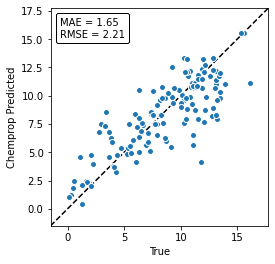

In [15]:
plot_parity(y_test, pred)

In [16]:
PearsonCoefficient(y_test, pred)

0.8175258751167327

In [17]:
R2Score(y_test, pred)

0.6642568399806956

In [18]:
import numpy as np
RMSE(y_test, pred)

2.213066296367535

In [20]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title= "PCE", hovermode= 'closest',
                   font = dict(family='Times New Roman',size=28),
                   xaxis= dict(title= 'Reported PCE (%)',zeroline= False, gridwidth= 2, dtick=2),
                   yaxis= dict(title= 'Predicted PCE (%)',zeroline= False, gridwidth= 2),#range=[-350,3750]),
                   height=600,
                   width=800,
                   showlegend= True                 
)

fit  = np.linspace(min(y_test), max(y_test))
trace0 = go.Scatter(x = y_test, y = pred, mode = 'markers', marker= dict(size= 12, color= 'blue'),name='Test Data')
# trace1 = go.Scatter(x = test_outputs ,y = y_pred, mode = 'markers', text=test_inputs.index,marker= dict(size= 12, color= 'red'), 
#                     error_y = dict(type='data',array=y_std,visible=True),name='Testing Data')
trace2 = go.Scatter(x = fit ,y = fit, mode = 'lines', marker= dict(size= 12, color= 'black'), text = 'Fit',name='Linear Fit')

data = [trace0,trace2]
fig= go.Figure(data, layout=layout0)
iplot(fig)